## 模拟退火算法(simulated annealing algorithm)

这是一种优化模型。即在有限的时间里找到最优解（或者近似最优解）  
在介绍SA算法之前，先介绍爬山算法。

### 爬山算法
爬山算法是一种比较简单的greedy算法(https://www.geeksforgeeks.org/greedy-algorithms/)。该算法每次从当前解的临近解空间中选择一个最优解作为当前解，直到达到一个局部最优解。问题是容易达到局部最优而不是全局最优。比如在下图中从 C 点出发，爬山算法只会取到A点，因为A点已经达到局部最优。

![](https://cdn.mathpix.com/snip/images/0X7H87W-v_KtKEbCfOM6UCvJUyhoXRyet2tSZqsUlnM.original.fullsize.png)

### 模拟退火思想

模拟退火是一种不完全的greedy算法，它的搜索过程引入了随机因素。模拟退火算法以**来接受一个比当前解要差的解**, 因此有可能会跳出这个局部的最优解, 达到全局的最优解。以上图为例, 模拟退火算法在搜索到局部最优解A后，会以一定的概率接受到E的移动。也许经过几次这样的不是局部最优的移动后会到达D点，于是就跳出了局部最大值A。

根据热力学的原理, 在温度为 $T$ 时, 出现能量差为 $d E$ 的降温的概率为 $P(\mathrm{dE})$, 表示为:
$$
P(d E)=\exp (d E /(k T))
$$
其中k是一个常数, exp表示自然指数, 且 $\mathrm(E)<0$ 。这条公式说白了就是: 温度越高, 出现一次能量差为 $\mathrm(dE)$ 的降温的概率就越大; 温度越低, 则出现降温的概率就越小。又由于 $\mathrm(dE)$ 总是小于0（否则就不叫退火 了）, 因此 $d E / k T<0$, 所以 $P(d E)$ 的函数取值范围是 $(0,1)$ 。
随着温度 $T$ 的降低, $P(\mathrm(dE))$ 会逐渐降低。
我们将一次向较差解的移动看做一次温度跳变过程, 我们以概率 $P(\mathrm(dE))$ 来接受这样的移动。




```  python
#### J(y)：在状态y时的评价函数值
#### Y(i)：表示当前状态
#### Y(i+1)：表示新的状态
#### r： 用于控制降温的快慢
#### T： 系统的温度，系统初始应该要处于一个高温的状态
#### T_min ：温度的下限，若温度T达到T_min，则停止搜索
while( T > T_min ):
　　dE = J( Y(i+1) ) - J( Y(i) ) 
　　if ( dE >=0 ):
        Y(i+1) = Y(i)
　　else
        # 函数exp( dE/T )的取值范围是(0,1) ，dE/T越大，则exp( dE/T )也
        if ( exp( dE/T ) > random( 0 , 1 ) ):
            Y(i+1) = Y(i) ; //接受从Y(i)到Y(i+1)的移动
　　T = r * T ; //降温退火 ，0<r<1 。r越大，降温越慢；r越小，降温越快
　　i ++ ;
)
```

### 范例1: 寻找polynomial function的最值

In [1]:
import numpy as np
import matplotlib.pyplot as plt

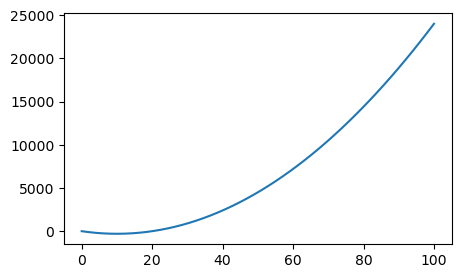

In [2]:

def x_function(x):
    return 3*x**2 - 60*x + 9

x = [i for i in np.linspace(0, 100)]
y = map(x_function, x)
plt.figure(figsize=(5, 3))
plt.plot(x, list(y))
plt.show()

定义域为[1,100], 最小值在x=10处取到

In [3]:
T = 1
# The initial temperature
x = np.random.uniform(0, 100)
# The final temperature
std = 0.00000001
# The cooling rate
a = 0.999
while T > std:
    y = x_function(x)
    # Generate a new x by random
    x_new = x + np.random.uniform(-1, 1)
    if 0 <= x_new <= 100:
        y_new = x_function(x_new)
        # If the new x is better, then replace the old x
        if y_new < y:
            x = x_new
        else:
            # If the new x is worse, then calculate the probability
            p = np.exp((y - y_new) / T)
            r = np.random.uniform(0, 1)
            if p > r:
                x = x_new
    # Cooling
    T = T * a
print(x, x_function(x))

9.999655492986898 -290.9999996439447


### 范例2: 旅行商最短路径问题
问题定义：https://en.wikipedia.org/wiki/Travelling_salesman_problem

In [4]:
### Use the simulated annealing algorithm to solve traveling salesman problem
### step 1: create data
### Cr. https://cloud.tencent.com/developer/article/1424760
### Cr. https://www.cnblogs.com/heaad/archive/2010/12/20/1911614.html
import numpy as np
city = [(1304,2312),(3639,1315),(4177,2244),(3712,1399),\
    (3488,1535),(3326,1556),(3238,1229),(4196,1004),\
    (4312,790),(4386,570),(3007,1970),(2562,1756),\
    (2788,1491),(2381,1676),(1332,695),\
    (3715,1678),(3918,2179),(4061,2370),\
    (3780,2212),(3676,2578),(4029,2838),\
    (4263,2931),(3429,1908),(3507,2367),\
    (3394,2643),(3439,3201),(2935,3240),\
    (3140,3550),(2545,2357),(2778,2826),\
    (2370,2975)]
city = np.array(city)
print(city.shape)
### define the distance by Euclidean distance
def distance(a, b):
    return np.sqrt(np.sum((a-b)**2))
def path_distance(path):
    dis = 0
    for i in range(len(path)-1):
        dis += distance(city[path[i]], city[path[i+1]])
    return dis
def init_path():
    path = [i for i in range(len(city))]
    np.random.shuffle(path)
    return path
def change_path(path):
    new_path = path.copy()
    a = np.random.randint(0, len(city))
    b = np.random.randint(0, len(city))
    new_path[a], new_path[b] = new_path[b], new_path[a]
    return new_path
if __name__ == "__main__":
    path = init_path()
    print(path_distance(path))
    T = 1000
    std = 0.00000001
    a = 0.999
    while T > std:
        new_path = change_path(path)
        new_dis = path_distance(new_path)
        old_dis = path_distance(path)
        if new_dis < old_dis:
            path = new_path
        else:
            p = np.exp((old_dis - new_dis) / T)
            r = np.random.uniform(0, 1)
            if p > r:
                path = new_path
        T = T * a
    print("This is the best path:")
    for i in path:
        if(i == path[-1]):
            print(city[i])
        else:
            print(city[i], end="->")
    print("The distance is:")
    print(path_distance(path))

(31, 2)
42128.411847492054
This is the best path:
[2370 2975]->[2545 2357]->[1304 2312]->[1332  695]->[2381 1676]->[2562 1756]->[2788 1491]->[3238 1229]->[4386  570]->[4312  790]->[4196 1004]->[3326 1556]->[3007 1970]->[3394 2643]->[2778 2826]->[2935 3240]->[3140 3550]->[3439 3201]->[4029 2838]->[4263 2931]->[4061 2370]->[4177 2244]->[3918 2179]->[3780 2212]->[3715 1678]->[3712 1399]->[3639 1315]->[3488 1535]->[3429 1908]->[3507 2367]->[3676 2578]
The distance is:
16479.240363444318


## 粒子群算法

粒子群算法是通过模拟鸟群捕食行为设计的一种群智能算法。区域内有大大小小不同的食物源，鸟群的任务是找到最大的食物源（全局最优解），鸟群的任务是找到这个食物源。鸟群在整个搜寻的过程中，通过相互传递各自位置的信息，让其他的鸟知道食物源的位置最终，整个鸟群都能聚集在食物源周围，即我们所说的找到了最优解，问题收敛。

基本步骤：
1. 根据初始状态参数确定每一个粒子的初始适应度值
2. 初始全局最优解是初始适应度最大的粒子所在的位置，每一个粒子的局部最优为本身
3. 更新位置和移动速度
4. 迭代

核心公式：
$$
\begin{gathered}
V_{i d}=\omega V_{i d}+C_1 \operatorname{random}(0,1)\left(P_{i d}-X_{i d}\right)+C_2 \operatorname{random}(0,1)\left(P_{g d}-X_{i d}\right) \\
X_{i d}=X_{i d}+V_{i d}
\end{gathered}
$$

其中, $\omega$ 称为惯性因子其值为非负, 较大时, 全局寻优能力强, 局部寻优能力强, 较小时, 全局寻优能力弱, 局部寻优能力强. 通过调整 $\omega$ 的大小, 可以对全局寻优性能和局部寻优性能进行调整. $C_1$ 和 $C_2$ 称为加速常 数, 前者为每个粒子的个体学习因子, 后者为每个粒子的社会学习因子。Suganthan 的实验表明: $C_1$ 和 $C_2$ 为 常数时可以得到较好的解, 通常设置 $C_1=C_2=2$, 但不一定必须等于 2, 一般取 $C_1=C_2 \in[0,4]$ 。 $\operatorname{random}(0,1)$ 表示区间 $[0,1]$ 上的随机数, $P_{i d}$ 表示第 $\mathrm{i}$ 个变量的个体极值的第 $\mathrm{d}$ 维, $P_{g d}$ 表示全局最优解的 第 $\mathrm{d}$ 维。

### 范例一：求最值

$$
y=x_2 e^{x_1}+x_3 \sin x_2+x_4 x_5
$$

The optimal value [25. 25.  1. 25. 25.]
The best fitting value 1800122483484.51


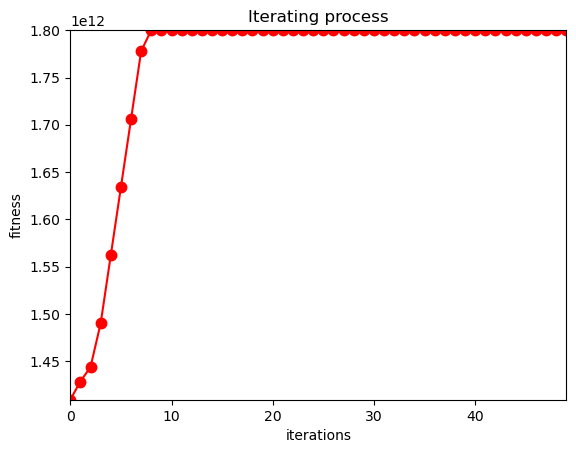

In [5]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

class PSO:
    def __init__(self, dimension, time, size, low, up, v_low, v_high):
        # 初始化
        self.dimension = dimension  # number of variables
        self.time = time  # iteration times
        self.size = size  # number of particles
        self.bound = []  # boundary of variables
        self.bound.append(low)
        self.bound.append(up)
        self.v_low = v_low
        self.v_high = v_high
        self.x = np.zeros((self.size, self.dimension))  # the position of particles
        self.v = np.zeros((self.size, self.dimension))  # the velocity of particles
        self.p_best = np.zeros((self.size, self.dimension))  # the optimal position of particles
        self.g_best = np.zeros((1, self.dimension))[0]  # the optimal position of swarm

        ### initialize the position and velocity of particles
        temp = -1000000
        for i in range(self.size):
            for j in range(self.dimension):
                self.x[i][j] = random.uniform(self.bound[0][j], self.bound[1][j])
                self.v[i][j] = random.uniform(self.v_low, self.v_high)
            self.p_best[i] = self.x[i]  # 储存最优的个体
            fit = self.fitness(self.p_best[i])
            if fit > temp:
                self.g_best = self.p_best[i]
                temp = fit
    # define the fitness function
    def fitness(self, x):
        x1 = x[0]
        x2 = x[1]
        x3 = x[2]
        x4 = x[3]
        x5 = x[4]
        y = math.floor((x2 * np.exp(x1) + x3 * np.sin(x2) + x4 + x5) * 100) / 100
        # print(y)
        return y

    def update(self, size):
        c1 = 2.0  # learning factor
        c2 = 2.0
        w = 0.8  # weight
        for i in range(size):
            # update the velocity and position of particles
            self.v[i] = w * self.v[i] + c1 * random.uniform(0, 1) * (
                    self.p_best[i] - self.x[i]) + c2 * random.uniform(0, 1) * (self.g_best - self.x[i])
            # check the boundary of velocity
            for j in range(self.dimension):
                if self.v[i][j] < self.v_low:
                    self.v[i][j] = self.v_low
                if self.v[i][j] > self.v_high:
                    self.v[i][j] = self.v_high

            # 更新位置
            self.x[i] = self.x[i] + self.v[i]
            # 位置限制
            for j in range(self.dimension):
                if self.x[i][j] < self.bound[0][j]:
                    self.x[i][j] = self.bound[0][j]
                if self.x[i][j] > self.bound[1][j]:
                    self.x[i][j] = self.bound[1][j]
            # 更新p_best和g_best
            if self.fitness(self.x[i]) > self.fitness(self.p_best[i]):
                self.p_best[i] = self.x[i]
            if self.fitness(self.x[i]) > self.fitness(self.g_best):
                self.g_best = self.x[i]

    def pso(self):
        best = []
        self.final_best = np.array([1, 2, 3, 4, 5])
        for gen in range(self.time):
            self.update(self.size)
            if self.fitness(self.g_best) > self.fitness(self.final_best):
                self.final_best = self.g_best.copy()
            temp = self.fitness(self.final_best)
            best.append(temp)
        print("The optimal value", self.final_best)
        print("The best fitting value", self.fitness(self.final_best))
        t = [i for i in range(self.time)]
        plt.figure()
        plt.plot(t, best, color='red', marker='.', ms=15)
        plt.rcParams['axes.unicode_minus'] = False
        plt.margins(0)
        plt.xlabel("iterations") 
        plt.ylabel("fitness")  
        plt.title("Iterating process")  
        plt.show()


if __name__ == '__main__':
    time = 50
    size = 100
    dimension = 5
    v_low = -1
    v_high = 1
    low = [1, 1, 1, 1, 1]
    up = [25, 25, 25, 25, 25]
    pso = PSO(dimension, time, size, low, up, v_low, v_high)
    pso.pso()



## 神经网络

神经网络是一种迭代求最优解的过程。

feed-forward propagation: 每一个神经元的关系都可以表示为 $y = f(WX + b)$。其中除去f函数就是我们熟悉的（多元）线性回归。函数f是非线性函数，通常有sigmoid, relu, tanh等等。
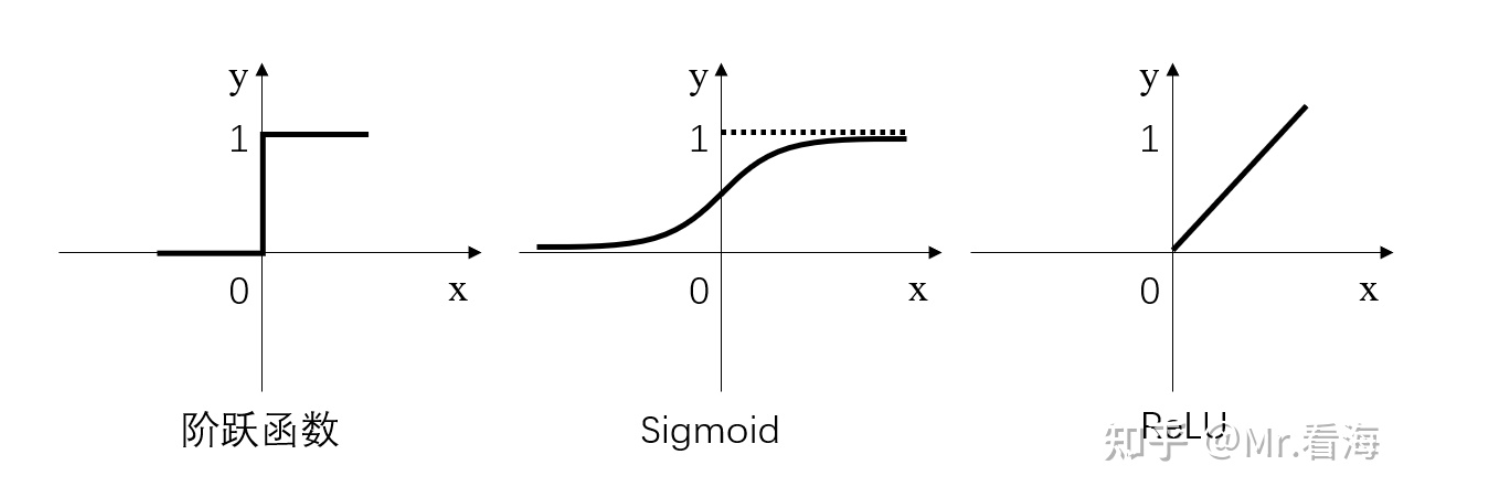作用是不让神经网络是假的线性回归（线性回归的叠加还是线性回归！）

backward propagation: 如何迭代训练？相比于线性回归的利用偏导数来联立方程求解，神经网络利用迭代逼近的方式来求解，好处是更加迅速和快速，所有系数都可以训练。
例子：对于 $w_i x_i + b_i$,我们求出y_i以后，计算出MSE（或者其他评估系数）偏导数（和线性回归方式一样）。假设对于系数$w$，偏导数是$\Delta$,那么我们更新w_{i+1}为 $w_i - \lambda * \Delta$，思考一下为什么是减！然后其他系数同理，$\lambda$是学习率(learning rate),这个系数的调参很重要，但是一般没有什么固定规律，需要依靠经验。学习率太小会拟合太慢!，过大会左右摇摆!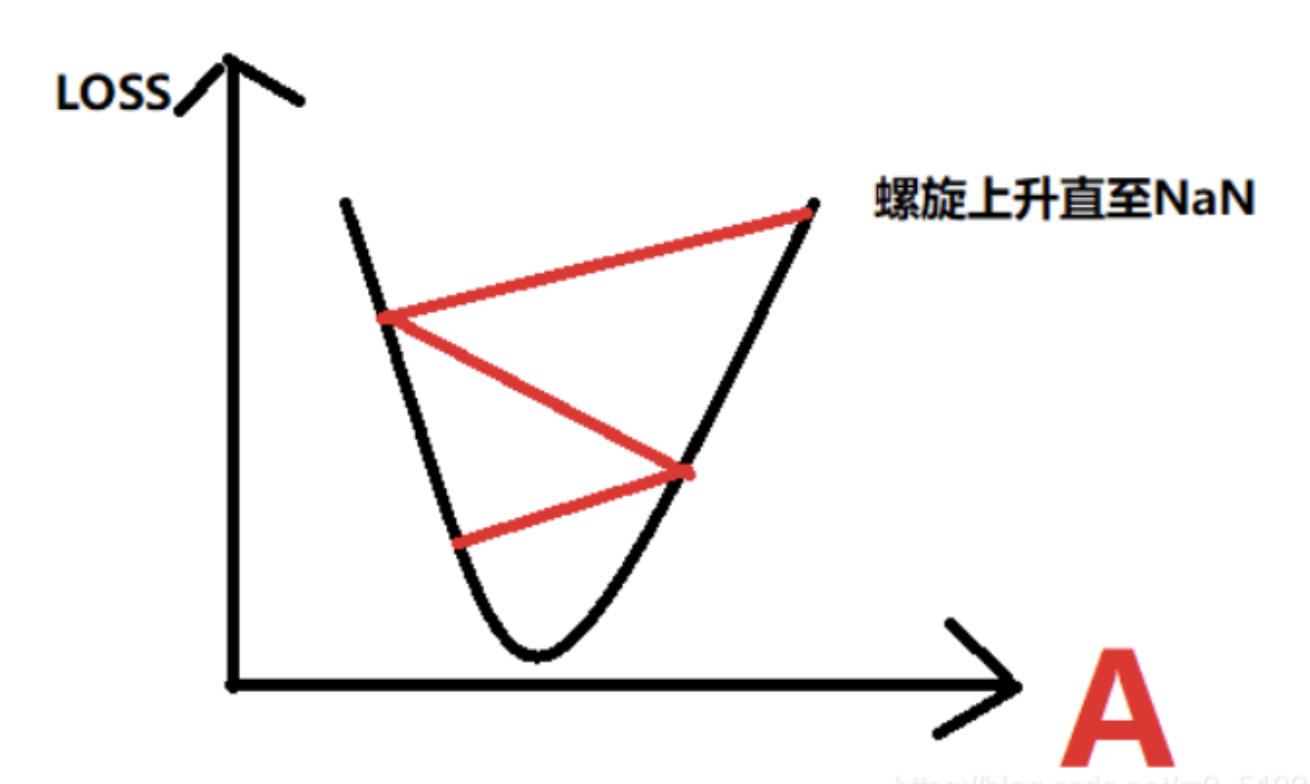

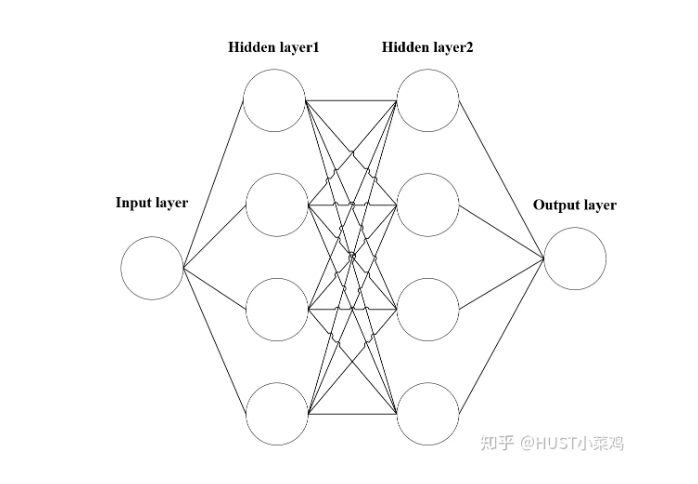

以下为pytorch实现神经网络的代码，不会pytorch的话可以不用深究每个函数的意思。

Net(
  (hidden1): Linear(in_features=1, out_features=20, bias=True)
  (hidden2): Linear(in_features=20, out_features=20, bias=True)
  (predict): Linear(in_features=20, out_features=1, bias=True)
)


/opt/homebrew/anaconda3/envs/SILENT/lib/python3.10/site-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


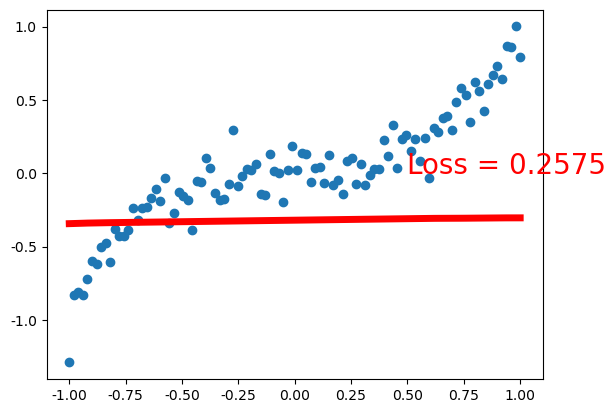

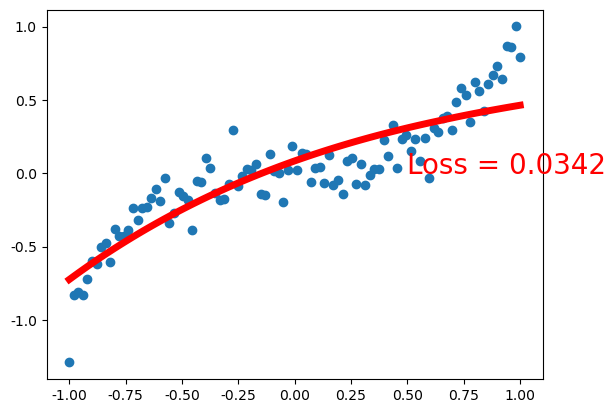

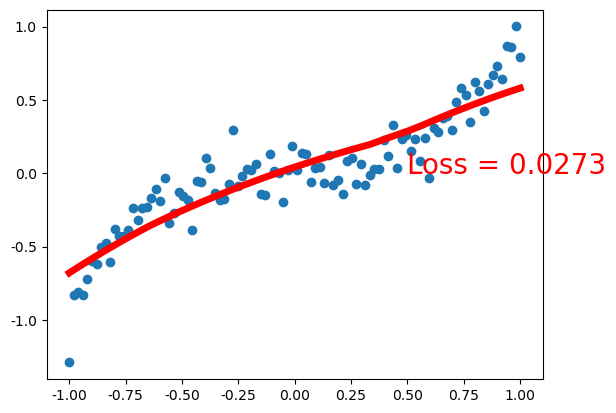

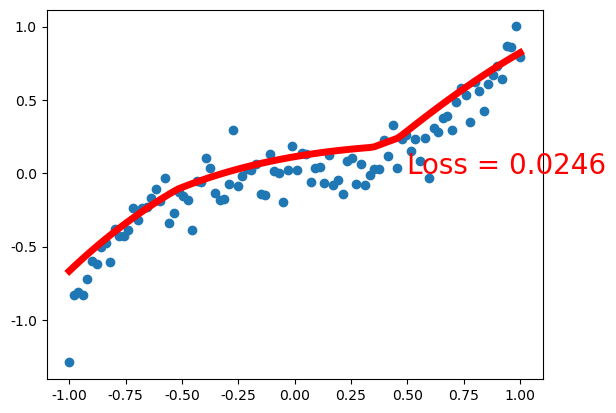

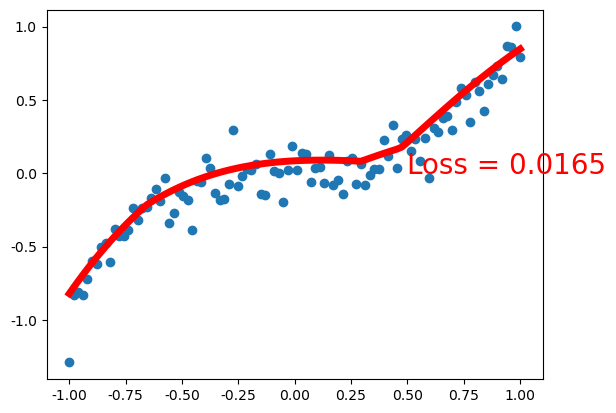

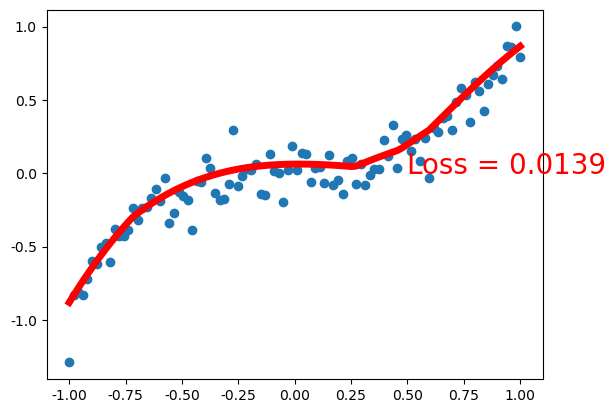

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable

x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
### y = x^3 + noise
y = x.pow(3)+0.1*torch.randn(x.size())

x , y =(Variable(x),Variable(y))

# plt.scatter(x,y)
# plt.scatter(x.data,y.data)
# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()
### define the network
class Net(nn.Module):
    def __init__(self,n_input,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden1 = nn.Linear(n_input,n_hidden)
        self.hidden2 = nn.Linear(n_hidden,n_hidden)
        self.predict = nn.Linear(n_hidden,n_output)
    def forward(self,input):
        out = self.hidden1(input)
        out = F.relu(out)
        out = self.hidden2(out)
        out = F.sigmoid(out)
        out =self.predict(out)

        return out

net = Net(1,20,1)
print(net)
### optimizer
optimizer = torch.optim.SGD(net.parameters(),lr = 0.3)
### loss function
loss_func = torch.nn.MSELoss()
### plt.ion() means that the plot will be updated with the code running
plt.ion()
plt.show()
### training
for t in range(3000):
    prediction = net(x)
    loss = loss_func(prediction,y)
    ### backpropagation
    optimizer.zero_grad()
    ### calculate the gradient
    loss.backward()
    ### update the parameters
    optimizer.step()
    ### plot the result
    if t % 500 ==0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss = %.4f' % loss.data, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.05)

plt.ioff()
plt.show()

## 遗传算法

Cr. https://zhuanlan.zhihu.com/p/378906456

遗传算法是和爬山算法（greedy），退火算法并列的优化算法。在介绍该算法核心之前，我们可以考虑：达尔文的进化论中提及的自然选择（求最优解）中的遗传过程，本质是通过继承优秀基因（此处的优秀定义为适应环境能力强），发生基因交叉，发生基因变异的三个过程来完成的，所以我们可以类似的通过这个过程来寻找最优解。

介绍基本概念：
1. 基因和染色体：对于如下函数而言, $[1,2,3] 、[1,3,2] 、[3,2,1]$ 均是这个函数的可行解 (代进去成立即为可行解）, 那么这些可行解在遗传算法中均被称为**染色体**。$$ 3 x+4 y+5 z<100 $$ 每一个可行解一共由三个元素构成, 每个元素就被称为组成染色体的一个**基因**。
2. 适应度函数：对于一个染色体，其在特定环境下的表现。可以理解为函数的值。
3. 选择：子代根据父代各染色体的适应度来选择继承父代的染色体。一般是赋权继承，即染色体i被选择的概率 = 染色体i的适应度 / 所有染色体的适应度之和。
4. 交换：将选出的两个染色体中的部分基因随机进行交换。注意这里交换是两个染色体的该位置以及该位置之后的所有基因进行交换，不仅仅是某一个基因的互换
5. 变异：随机地改变某一个体的某个字符后添入新群体中

接下来介绍基本过程：  
求 $f(x)=\$ x^{\wedge} 2 \$$ 极大值问题, 设自变量 $x$ 介于 $0 \sim 31$, 求其二次函数的最大值, 即: $\max f(x)=$ $\$ x^{\wedge} 2 \$, x \in[0,31]$
1. 编码 遗传算法首先要对实际问题进行编码, 用字符串表达问题。这种字符串相当于遗传学中 的染色体。每一代所产生的字符串个体总和称为群体。为了实现的方便, 通常字符串长度固定, 字 符选0或1。本例中, 利用 5 位二进制数表示 $x$ 值, 采用随机产生的方法, 假设得出拥有四个个体的 初始群体, 即: 01101,11000 , 01000,10011 。值相应为 $13,24,8, 19$。
2. 计算适应度 衡量字符串（染色体）好坏的指标是适应度，它也就是遗传算法的目标函数。本例中用$x^2$计算。
3. 复制 根据相对适应度的大小对个体进行取舍，2号个体性能最优，予以复制繁殖。3号个体性能最差，将它删除，使之死亡。（但一切以概率选择而成）
4. 交换。利用随机配对的方法，决定1号和2号个体、3号和4号个体分别交换。再利用随机定位的方法，确定这两对母体交叉换位的位置分别从字符长度的第4位及第3位开始。如：3号、4号个体从字符长度第3位开始交换。交换开始的位置称交换点
5. 突变 将个体字符串某位符号进行逆变，即由1变为0或由0变为1。突变的意义：使函数跳出原有求解空间，更容易找到最优解（**优化算法的普遍思想**）

<Figure size 640x480 with 0 Axes>

max_fitness: 3768.54361504156
最优的基因型： [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1
 1 0 0 0 0 0 0 1 1 1 1]
(x, y): (-2.0472011718273864, -1.9402463314680058)
3768.54361504156


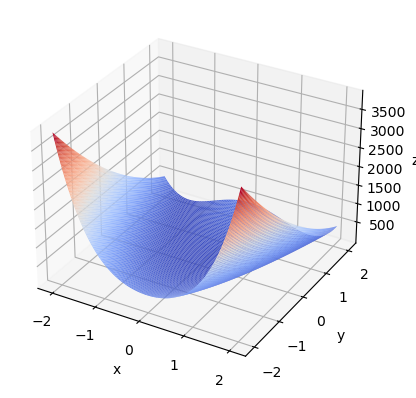

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

DNA_SIZE = 24
POP_SIZE = 80
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.01
N_GENERATIONS = 100
X_BOUND = [-2.048, 2.048]
Y_BOUND = [-2.048, 2.048]


def F(x, y):
    return 100.0 * (y - x ** 2.0) ** 2.0 + (1 - x) ** 2.0  # 以香蕉函数为例


def plot_3d(ax):
    X = np.linspace(*X_BOUND, 100)
    Y = np.linspace(*Y_BOUND, 100)
    X, Y = np.meshgrid(X, Y)
    Z = F(X, Y)
    ax = plt.axes(projection='3d')
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.pause(3)
    plt.show()


def get_fitness(pop):
    x, y = translateDNA(pop)
    pred = F(x, y)
    return pred
    # return pred - np.min(pred)+1e-3  # 求最大值时的适应度
    # return np.max(pred) - pred + 1e-3  # 求最小值时的适应度，通过这一步fitness的范围为[0, np.max(pred)-np.min(pred)]


def translateDNA(pop):  # pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目
    x_pop = pop[:, 0:DNA_SIZE]  # 前DNA_SIZE位表示X
    y_pop = pop[:, DNA_SIZE:]  # 后DNA_SIZE位表示Y
    # 将二进制转化为十进制，再将十进制转化为实数
    x = x_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (X_BOUND[1] - X_BOUND[0]) + X_BOUND[0]
    y = y_pop.dot(2 ** np.arange(DNA_SIZE)[::-1]) / float(2 ** DNA_SIZE - 1) * (Y_BOUND[1] - Y_BOUND[0]) + Y_BOUND[0]
    return x, y


def crossover_and_mutation(pop, CROSSOVER_RATE=0.8):
    new_pop = []
    for father in pop:  # 遍历种群中的每一个个体，将该个体作为父亲
        child = father  # 孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
        if np.random.rand() < CROSSOVER_RATE:  # 产生子代时不是必然发生交叉，而是以一定的概率发生交叉
            mother = pop[np.random.randint(POP_SIZE)]  # 再种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low=0, high=DNA_SIZE * 2)  # 随机产生交叉的点
            child[cross_points:] = mother[cross_points:]  # 孩子得到位于交叉点后的母亲的基因
        mutation(child)  # 每个后代有一定的机率发生变异
        new_pop.append(child)

    return new_pop


def mutation(child, MUTATION_RATE=0.003):
    if np.random.rand() < MUTATION_RATE:  # 以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0, DNA_SIZE)  # 随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point] ^ 1  # 将变异点的二进制为反转


def select(pop, fitness):  # nature selection wrt pop's fitness
    idx = np.random.choice(np.arange(POP_SIZE), size=POP_SIZE, replace=True,
                           p=(fitness) / (fitness.sum()))
    return pop[idx]


def print_info(pop):
    fitness = get_fitness(pop)
    max_fitness_index = np.argmax(fitness)
    print("max_fitness:", fitness[max_fitness_index])
    x, y = translateDNA(pop)
    print("最优的基因型：", pop[max_fitness_index])
    print("(x, y):", (x[max_fitness_index], y[max_fitness_index]))


if __name__ == "__main__":
    fig = plt.figure()
    ax = Axes3D(fig)
    plt.ion()  # 将画图模式改为交互模式，程序遇到plt.show不会暂停，而是继续执行
    
    pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE * 2))  # matrix (POP_SIZE, DNA_SIZE)
    for _ in range(N_GENERATIONS):  # 迭代N代
        x, y = translateDNA(pop)
        if 'sca' in locals():
            sca.remove()
        sca = ax.scatter(x, y, F(x, y), c='black', marker='o')
        plt.show()
        plt.pause(0.1)
        pop = np.array(crossover_and_mutation(pop, CROSSOVER_RATE))
        fitness = get_fitness(pop)
        pop = select(pop, fitness)  # 选择生成新的种群

    print_info(pop)
    plt.ioff()
    plot_3d(ax)